In [1]:
# Imports
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import Vectorizer
from Common_Time import tunes as tunes_raw
BAR_SUBDIVISION = 48
FILENAME = 'tunes'

In [2]:
tunes = pd.DataFrame.from_dict(tunes_raw, orient='index')
tunes['abc_raw'] = tunes.abc # preserve the original abc strings
tunes.head(10)

,setting,type,mode,meter,tune,abc,abc_raw
1,1,reel,Edorian,4/4,1,D2|EBBAB2EB|B2ABdBAG|FDADBDAD|FDADdAFD|EBBAB2E...,D2|EBBAB2EB|B2ABdBAG|FDADBDAD|FDADdAFD|EBBAB2E...
2,2,reel,Dmajor,4/4,2,A2FAA2dB|A2FABEE2|A2FAA2Bd|egfdedBd|A2FAA2dB|A...,A2FAA2dB|A2FABEE2|A2FAA2Bd|egfdedBd|A2FAA2dB|A...
3,3,reel,Gmajor,4/4,3,BA|G2BGAFDF|G2Bdc2BA|G2BGAFDF|GEEGc2BA|G2BGAFD...,BA|G2BGAFDF|G2Bdc2BA|G2BGAFDF|GEEGc2BA|G2BGAFD...
4,4,hornpipe,Dmajor,4/4,4,ag|faefdeAF|DFAdf2ef|gbegdeAF|GBAGE2ag|faefdeA...,ag|faefdeAF|DFAdf2ef|gbegdeAF|GBAGE2ag|faefdeA...
7,7,hornpipe,Adorian,4/4,7,EG|A2ABAGE2|cdecd2eg|agedcded|cAGEG2cB|A2ABAGE...,EG|A2ABAGE2|cdecd2eg|agedcded|cAGEG2cB|A2ABAGE...
8,8,reel,Gmajor,4/4,8,G2GDEDEG|AGABd2Bd|egedBAGA|BAGEEDDE|G2GDEDEG|A...,G2GDEDEG|AGABd2Bd|egedBAGA|BAGEEDDE|G2GDEDEG|A...
13,13,hornpipe,Dmajor,4/4,13,de|fefgafge|fdecdBAG|FEDEFGAB|=cAd^cA2de|fefga...,de|fefgafge|fdecdBAG|FEDEFGAB|=cAd^cA2de|fefga...
16,16,reel,Amajor,4/4,16,ceefecBA|dfff=gfed|ceefecBA|dBBAB2d2|ceefecBA|...,ceefecBA|dfff=gfed|ceefecBA|dBBAB2d2|ceefecBA|...
18,18,reel,Dmajor,4/4,18,A2FABAFA|A2FABAFA|B2BAB2BA|B2BABAFA|A2FABAFA|A...,A2FABAFA|A2FABAFA|B2BAB2BA|B2BABAFA|A2FABAFA|A...
21,21,reel,Aminor,4/4,21,A2cAABcA|GcEGG2EG|A2cAABcd|ecdBcAA2|A2cAABcA|G...,A2cAABcA|GcEGG2EG|A2cAABcd|ecdBcAA2|A2cAABcA|G...


In [3]:
tunes = Vectorizer.vectorize_frame(tunes, pad_bars=True)

In [4]:
print("Size of Frame: {}".format(len(tunes.index)))
tunes.head()

Size of Frame: 11024


,setting,type,mode,meter,tune,abc,abc_raw,notes,timing
0,1,reel,Edorian,4/4,1,D2|EBBAB2EB|B2ABdBAG|FDADBDAD|FDADdAFD|EBBAB2E...,D2|EBBAB2EB|B2ABdBAG|FDADBDAD|FDADdAFD|EBBAB2E...,"[[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, ...","[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,2,reel,Dmajor,4/4,2,A2FAA2dB|A2FABEE2|A2FAA2Bd|egfdedBd|A2FAA2dB|A...,A2FAA2dB|A2FABEE2|A2FAA2Bd|egfdedBd|A2FAA2dB|A...,"[[69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, ...","[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,..."
2,3,reel,Gmajor,4/4,3,BA|G2BGAFDF|G2Bdc2BA|G2BGAFDF|GEEGc2BA|G2BGAFD...,BA|G2BGAFDF|G2Bdc2BA|G2BGAFDF|GEEGc2BA|G2BGAFD...,"[[71, 71, 71, 71, 71, 71, 69, 69, 69, 69, 69, ...","[[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,4,hornpipe,Dmajor,4/4,4,ag|faefdeAF|DFAdf2ef|gbegdeAF|GBAGE2ag|faefdeA...,ag|faefdeAF|DFAdf2ef|gbegdeAF|GBAGE2ag|faefdeA...,"[[81, 81, 81, 81, 81, 81, 79, 79, 79, 79, 79, ...","[[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,7,hornpipe,Adorian,4/4,7,EG|A2ABAGE2|cdecd2eg|agedcded|cAGEG2cB|A2ABAGE...,EG|A2ABAGE2|cdecd2eg|agedcded|cAGEG2cB|A2ABAGE...,"[[64, 64, 64, 64, 64, 64, 67, 67, 67, 67, 67, ...","[[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,..."


<h2>Excess Notes</h2>
Some of the vectors have more than 48 notes per bar for various reasons. <br>
Filtering them out reduces the size of the dataset but ensures consistent image size

In [5]:
tunes_shaped = tunes[[len(tune.shape)==2 for tune in tunes.notes]].copy()
print("Size of Frame: {}".format(len(tunes_shaped.index)))
tunes_shaped.reset_index(drop=True, inplace=True)
tunes_shaped.head()

Size of Frame: 7861


,setting,type,mode,meter,tune,abc,abc_raw,notes,timing
0,2,reel,Dmajor,4/4,2,A2FAA2dB|A2FABEE2|A2FAA2Bd|egfdedBd|A2FAA2dB|A...,A2FAA2dB|A2FABEE2|A2FAA2Bd|egfdedBd|A2FAA2dB|A...,"[[69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, ...","[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,..."
1,4,hornpipe,Dmajor,4/4,4,ag|faefdeAF|DFAdf2ef|gbegdeAF|GBAGE2ag|faefdeA...,ag|faefdeAF|DFAdf2ef|gbegdeAF|GBAGE2ag|faefdeA...,"[[81, 81, 81, 81, 81, 81, 79, 79, 79, 79, 79, ...","[[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,8,reel,Gmajor,4/4,8,G2GDEDEG|AGABd2Bd|egedBAGA|BAGEEDDE|G2GDEDEG|A...,G2GDEDEG|AGABd2Bd|egedBAGA|BAGEEDDE|G2GDEDEG|A...,"[[67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, ...","[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,..."
3,13,hornpipe,Dmajor,4/4,13,de|fefgafge|fdecdBAG|FEDEFGAB|=cAd^cA2de|fefga...,de|fefgafge|fdecdBAG|FEDEFGAB|=cAd^cA2de|fefga...,"[[74, 74, 74, 74, 74, 74, 76, 76, 76, 76, 76, ...","[[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,16,reel,Amajor,4/4,16,ceefecBA|dfff=gfed|ceefecBA|dBBAB2d2|ceefecBA|...,ceefecBA|dfff=gfed|ceefecBA|dBBAB2d2|ceefecBA|...,"[[72, 72, 72, 72, 72, 72, 76, 76, 76, 76, 76, ...","[[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,..."


<h2>A little analysis </h2>

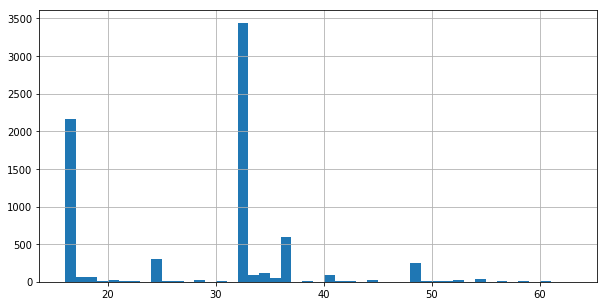

In [6]:
lst = []
for tune in tunes_shaped.notes:
    lst.append(tune.shape[0])
tunes_shaped['num_bars'] = lst
tunes_shaped.num_bars.hist(bins=range(16,64,1),figsize=(10,5))
pass

<h2>Export the data<h2>

In [7]:
np.save('exports/'+FILENAME+'_notes',tunes_shaped.notes.values)
np.save('exports/'+FILENAME+'_time',tunes_shaped.timing.values)